<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [585]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [586]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-07-11 18:20:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-07-11 18:20:35 (225 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [587]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [588]:
df.shape

(346, 10)

In [589]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

### Convert to date time object


In [590]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [591]:
#Dropping first 2 columns
df.drop(df.columns[0:2], inplace=True, axis=1)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [592]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


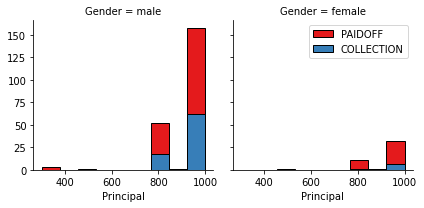

In [593]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

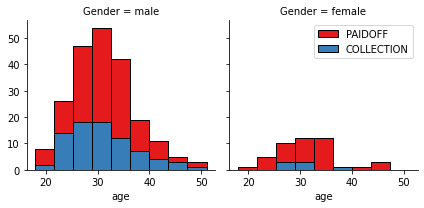

In [594]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


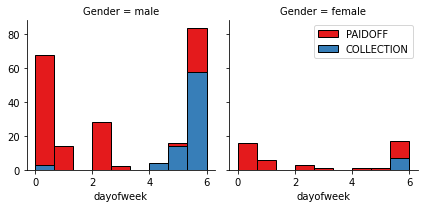

In [595]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [596]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [597]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [598]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [599]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [600]:
#Lets convert the loan_status from PAIDOFF and COLLECTION to 1 and 0
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


#### Features before One Hot Encoding


In [601]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [602]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [603]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [604]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [605]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [606]:
#Splitting the loan_train.csv to train and test for model development 

In [607]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [608]:
#Creating a KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print ("KNN MODEL")

KNN MODEL


In [609]:
#Storing accuracies of KNN models for different values of k in array
knn_accuracylist=[]
for K in range(15):
    K = K+1
    #Creating model
    knnmodel = KNeighborsClassifier(n_neighbors = K)
    knnmodel.fit(X_train, y_train)
    knnpred=knnmodel.predict(X_test)
    knnresults=confusion_matrix(y_test,knnpred)
    knnacc_score=accuracy_score(y_test,knnpred)
    print("The accuracy of KNN model for k=",K,"is:%0.4f"%knnacc_score)
    print("The confustion matrix is:\n",knnresults)
    #Adding the accuracy scores to the list for different values of K
    knn_accuracylist.append(knnacc_score)
#Determing the best /maximum accuracy 
print("Maximum accuracy using KNN Model is:%0.4f"%max(knn_accuracylist))


The accuracy of KNN model for k= 1 is:0.7115
The confustion matrix is:
 [[ 6 16]
 [14 68]]
The accuracy of KNN model for k= 2 is:0.6250
The confustion matrix is:
 [[13  9]
 [30 52]]
The accuracy of KNN model for k= 3 is:0.7404
The confustion matrix is:
 [[ 6 16]
 [11 71]]
The accuracy of KNN model for k= 4 is:0.6538
The confustion matrix is:
 [[ 8 14]
 [22 60]]
The accuracy of KNN model for k= 5 is:0.6827
The confustion matrix is:
 [[ 2 20]
 [13 69]]
The accuracy of KNN model for k= 6 is:0.6827
The confustion matrix is:
 [[ 6 16]
 [17 65]]
The accuracy of KNN model for k= 7 is:0.6827
The confustion matrix is:
 [[ 2 20]
 [13 69]]
The accuracy of KNN model for k= 8 is:0.6731
The confustion matrix is:
 [[ 5 17]
 [17 65]]
The accuracy of KNN model for k= 9 is:0.6827
The confustion matrix is:
 [[ 2 20]
 [13 69]]
The accuracy of KNN model for k= 10 is:0.6827
The confustion matrix is:
 [[ 4 18]
 [15 67]]
The accuracy of KNN model for k= 11 is:0.6731
The confustion matrix is:
 [[ 1 21]
 [13 69

In [610]:
# The highest accuracy of KNN model is 74.04% at K=3. Hence this can be taken as the final model

In [611]:
# Final model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn.score(X_test, y_test)))

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



Accuracy of K-NN classifier on training set: 0.8347
Accuracy of K-NN classifier on test set: 0.7404
[[ 6 16]
 [11 71]]
              precision    recall  f1-score   support

           0       0.35      0.27      0.31        22
           1       0.82      0.87      0.84        82

    accuracy                           0.74       104
   macro avg       0.58      0.57      0.57       104
weighted avg       0.72      0.74      0.73       104



# Decision Tree


In [612]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [613]:
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train,y_train)
print("Accuracy of Decision Tree model on train set is:%0.4f"%tree_classifier.score(X_train,y_train))

print("Accuracy of Decision Tree model on test set is:%0.4f"%tree_classifier.score(X_test,y_test))

Accuracy of Decision Tree model on train set is:0.9050
Accuracy of Decision Tree model on test set is:0.6442


In [614]:
treepred=tree_classifier.predict(X_test)
treeresults=confusion_matrix(y_test,treepred)
print("Accuracy of Decision Tree model on test set is:%0.4f"%tree_classifier.score(X_test,y_test))
print("The confusion matrix is:\n",treeresults)

Accuracy of Decision Tree model on test set is:0.6442
The confusion matrix is:
 [[ 9 13]
 [24 58]]


In [615]:
#Creating a new decision tree model with specified depth
tree_classifier_new = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_classifier_new.fit(X_train,y_train)
print("Accuracy of Decision Tree model on train set is:%0.4f"%tree_classifier.score(X_train,y_train))

print("Accuracy of Decision Tree model on test set is:%0.4f"%tree_classifier.score(X_test,y_test))

Accuracy of Decision Tree model on train set is:0.9050
Accuracy of Decision Tree model on test set is:0.6442


In [616]:
print("The importance of features of tree model is:\n",tree_classifier.feature_importances_)

The importance of features of tree model is:
 [0.06512551 0.1034165  0.33336277 0.07181633 0.29933838 0.01684634
 0.04132597 0.06876822]


# Support Vector Machine


In [617]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=0)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.69
[[ 6 16]
 [16 66]]
              precision    recall  f1-score   support

           0       0.27      0.27      0.27        22
           1       0.80      0.80      0.80        82

    accuracy                           0.69       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.69      0.69      0.69       104



In [618]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.71
[[ 4 18]
 [12 70]]
              precision    recall  f1-score   support

           0       0.25      0.18      0.21        22
           1       0.80      0.85      0.82        82

    accuracy                           0.71       104
   macro avg       0.52      0.52      0.52       104
weighted avg       0.68      0.71      0.69       104



In [619]:
svm_model=LinearSVC(random_state=0)
svm_model.fit(X_train,y_train)

LinearSVC(random_state=0)

In [620]:
print("Accuracy of support vector Machine model on train set is:%0.4f"%svm_model.score(X_train,y_train))

print("Accuracy of support vector Machine model on test set is:%0.4f"%svm_model.score(X_test,y_test))


Accuracy of support vector Machine model on train set is:0.7562
Accuracy of support vector Machine model on test set is:0.6923


In [621]:
svmpred=svm_model.predict(X_test)
svmresults=confusion_matrix(y_test,svmpred)
print("The confusion matrix is\n",svmresults)

The confusion matrix is
 [[ 6 16]
 [16 66]]


# Logistic Regression


In [622]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.68
[[ 4 18]
 [15 67]]
              precision    recall  f1-score   support

           0       0.21      0.18      0.20        22
           1       0.79      0.82      0.80        82

    accuracy                           0.68       104
   macro avg       0.50      0.50      0.50       104
weighted avg       0.67      0.68      0.67       104



In [623]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [624]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [625]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7644628099173554
Testing Data Score: 0.6826923076923077


In [626]:
logpred=classifier.predict(X_test)
logacc_score=accuracy_score(y_test,logpred)
logresults=confusion_matrix(y_test,logpred)
print("The accuracy of logistic regression model is:%0.4f"%logacc_score)
print("The confusion_matrix is :\n",logresults)

The accuracy of logistic regression model is:0.6827
The confusion_matrix is :
 [[ 4 18]
 [15 67]]


# Model Evaluation using Test set


In [627]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [628]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-07-11 18:20:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-07-11 18:20:39 (531 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [629]:
test_df = pd.read_csv('loan_test.csv')
test_df.shape


(54, 10)

In [630]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [631]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,1,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,1,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,1,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,1,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,1,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [632]:
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [633]:
# doing the same preprocessing as done earlier with train set. i.e. converting date , one hot encoding for categorical variables etc

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.drop(test_df.columns[0:2], inplace=True, axis=1)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()



,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [634]:
test_X=test_Feature
test_X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [635]:
test_y=test_df['loan_status'].values
test_y[0:5]

array([1, 1, 1, 1, 1])

In [636]:
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [637]:
#THe entire train_set data is used for training this time and test_set data given in the problem is used for testing/validation
X_train_new=X
y_train_new=y
X_test_new=test_X
y_test_new=test_y


In [638]:
#Models
#KNN
knn_new = KNeighborsClassifier(n_neighbors = 3)
knn_new.fit(X_train_new, y_train_new)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_new.score(X_train_new, y_train_new)))


pred_new = knn_new.predict(X_test_new)
print(confusion_matrix(y_test_new, pred_new))
print(classification_report(y_test_new, pred_new))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn_new.score(X_test_new,y_test_new)))


Accuracy of K-NN classifier on training set: 0.8208
[[ 4 10]
 [ 8 32]]
              precision    recall  f1-score   support

           0       0.33      0.29      0.31        14
           1       0.76      0.80      0.78        40

    accuracy                           0.67        54
   macro avg       0.55      0.54      0.54        54
weighted avg       0.65      0.67      0.66        54

Accuracy of K-NN classifier on test set: 0.6667


In [639]:
#Since the accuracy on test set is low ,compared to train set, let us finetune the k again , this time trying k=5
knn_new = KNeighborsClassifier(n_neighbors = 5)
knn_new.fit(X_train_new, y_train_new)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_new.score(X_train_new, y_train_new)))


pred_new = knn_new.predict(X_test_new)
print(confusion_matrix(y_test_new, pred_new))
print(classification_report(y_test_new, pred_new))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn_new.score(X_test_new,y_test_new)))

Accuracy of K-NN classifier on training set: 0.8121
[[ 5  9]
 [ 6 34]]
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.79      0.85      0.82        40

    accuracy                           0.72        54
   macro avg       0.62      0.60      0.61        54
weighted avg       0.70      0.72      0.71        54

Accuracy of K-NN classifier on test set: 0.7222


In [640]:
#Let's try with k=7
knn_new = KNeighborsClassifier(n_neighbors = 7)
knn_new.fit(X_train_new, y_train_new)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_new.score(X_train_new, y_train_new)))


pred_new = knn_new.predict(X_test_new)
print(confusion_matrix(y_test_new, pred_new))
print(classification_report(y_test_new, pred_new))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn_new.score(X_test_new,y_test_new)))

Accuracy of K-NN classifier on training set: 0.8006
[[ 4 10]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.78      0.88      0.82        40

    accuracy                           0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54

Accuracy of K-NN classifier on test set: 0.7222


In [641]:
#Since there is not much improvement in accuracy with K=7, we can consider k=5 as our final model

knn_new = KNeighborsClassifier(n_neighbors = 5)
knn_new.fit(X_train_new, y_train_new)
print('Accuracy of K-NN classifier on training set: {:.4f}'
     .format(knn_new.score(X_train_new, y_train_new)))


pred_new = knn_new.predict(X_test_new)
print(confusion_matrix(y_test_new, pred_new))
print(classification_report(y_test_new, pred_new))
print('Accuracy of K-NN classifier on test set: {:.4f}'
     .format(knn_new.score(X_test_new,y_test_new)))



Accuracy of K-NN classifier on training set: 0.8121
[[ 5  9]
 [ 6 34]]
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.79      0.85      0.82        40

    accuracy                           0.72        54
   macro avg       0.62      0.60      0.61        54
weighted avg       0.70      0.72      0.71        54

Accuracy of K-NN classifier on test set: 0.7222


In [642]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test_new,pred_new)


0.6938775510204082

In [643]:
from sklearn.metrics import f1_score
f1_score(y_test_new, pred_new, zero_division=1)

0.8192771084337349

In [644]:
#decision tree model
tree_classifier_new_test = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_classifier_new_test.fit(X_train_new,y_train_new)
print("Accuracy of Decision Tree model on train set is:%0.4f"%tree_classifier_new.score(X_train_new,y_train_new))

print("Accuracy of Decision Tree model on test set is:%0.4f"%tree_classifier_new.score(X_test_new,y_test_new))
treeprednew=tree_classifier_new.predict(X_test_new)
treeresultsnew=confusion_matrix(y_test_new,treeprednew)
print("Accuracy of Decision Tree model on test set is:%0.4f"%tree_classifier_new.score(X_test_new,y_test_new))
print("The confusion matrix is:\n",treeresultsnew)

Accuracy of Decision Tree model on train set is:0.7370
Accuracy of Decision Tree model on test set is:0.7407
Accuracy of Decision Tree model on test set is:0.7407
The confusion matrix is:
 [[ 5  9]
 [ 5 35]]


In [645]:
jaccard_score(y_test_new,treeprednew)

0.7142857142857143

In [646]:
f1_score(y_test_new, treeprednew, zero_division=1)

0.8333333333333334

In [647]:
#SVM
svm_model_new=LinearSVC(random_state=0)
svm_model_new.fit(X_train_new,y_train_new)
print("Accuracy of support vector Machine model on train set is:%0.4f"%svm_model_new.score(X_train_new,y_train_new))
print("Accuracy of support vector Machine model on test set is:%0.4f"%svm_model_new.score(X_test_new,y_test_new))
svmprednew=svm_model_new.predict(X_test_new)
svmresultsnew=confusion_matrix(y_test_new,svmprednew)
print("The confusion matrix is\n",svmresultsnew)

Accuracy of support vector Machine model on train set is:0.7399
Accuracy of support vector Machine model on test set is:0.7407
The confusion matrix is
 [[ 0 14]
 [ 0 40]]


In [648]:
jaccard_score(y_test_new,svmprednew)

0.7407407407407407

In [649]:
f1_score(y_test_new,svmprednew)

0.851063829787234

In [650]:
#Logistic Regression
classifier_new = LogisticRegression()
classifier_new.fit(X_train_new, y_train_new)

print(f"Training Data Accuracy: {classifier_new.score(X_train_new, y_train_new)}")
print(f"Testing Data Accuracy: {classifier_new.score(X_test_new, y_test_new)}")
logprednew=classifier_new.predict(X_test_new)
logacc_score_new=accuracy_score(y_test_new,logprednew)
logresultsnew=confusion_matrix(y_test_new,logprednew)
print("The accuracy of logistic regression model is:%0.4f"%logacc_score_new)
print("The confusion_matrix is :\n",logresultsnew)

Training Data Accuracy: 0.7543352601156069
Testing Data Accuracy: 0.7592592592592593
The accuracy of logistic regression model is:0.7593
The confusion_matrix is :
 [[ 1 13]
 [ 0 40]]


In [651]:
jaccard_score(y_test_new,logprednew)

0.7547169811320755

In [652]:
f1_score(y_test_new,logprednew)

0.8602150537634409

In [653]:
from sklearn.metrics import log_loss
log_loss(y_test_new, logprednew)

8.315083109267249

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.693   | 0.819    | NA      |
| Decision Tree      | 0.714   | 0.833    | NA      |
| SVM                | 0.741   | 0.851    | NA      |
| LogisticRegression | 0.755   | 0.860    | 8.31    |
